In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [37]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [38]:
train_images.shape

(60000, 28, 28)

In [39]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

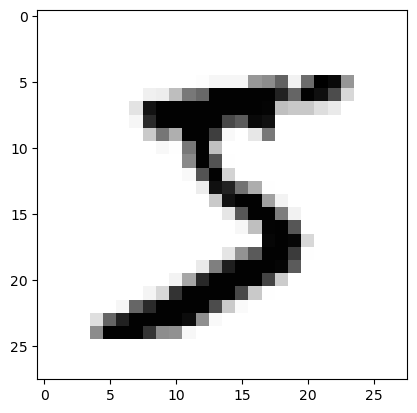

In [40]:
plt.imshow(train_images[0], cmap="Greys")

In [41]:
model = tf.keras.models.Sequential()

In [42]:
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [43]:
model.compile(optimizer='rmsprop',loss='mse', metrics=['accuracy'])

In [44]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

In [45]:
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

In [46]:
test_images.shape

(10000, 784)

In [47]:
train_images.shape

(60000, 784)

In [48]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [49]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0161 - accuracy: 0.9151
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0063 - accuracy: 0.9659
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0045 - accuracy: 0.9763
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9826
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0028 - accuracy: 0.9861


In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy : ", test_acc)

313/313 [==============================] - 0s 982us/step - loss: 0.0036 - accuracy: 0.9813
Accuracy :  0.9812999963760376


In [51]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9884
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 0.9904
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0017 - accuracy: 0.9919
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0014 - accuracy: 0.9929
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0012 - accuracy: 0.9938


In [52]:
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

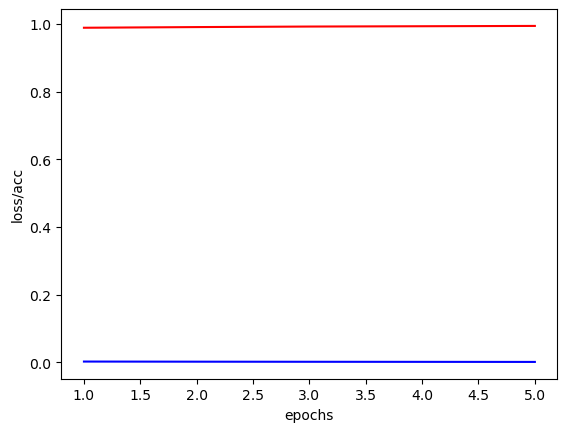

In [53]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models

In [55]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

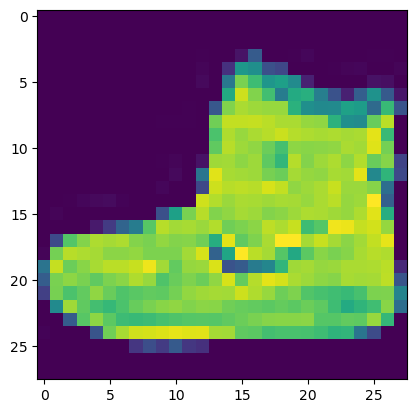

In [56]:
plt.imshow(train_images[0])

In [57]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [58]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5597 - accuracy: 0.8089
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4072 - accuracy: 0.8592
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3647 - accuracy: 0.8716
Epoch 4/5
469/469 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8794
Epoch 5/5
469/469 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8856


In [61]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 464us/step - loss: 0.3554 - accuracy: 0.8725


In [62]:
print('Accuracy : ', test_acc)

Accuracy :  0.8725000023841858


In [63]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
train = pd.read_csv("train.csv", sep = ',')
test = pd.read_csv("test.csv", sep = ',')

In [65]:
train.drop(['SibSp','Parch','Ticket','Embarked','Name','Cabin','PassengerId','Fare','Age'], inplace=True, axis=1)

In [66]:
train.dropna(inplace = True)

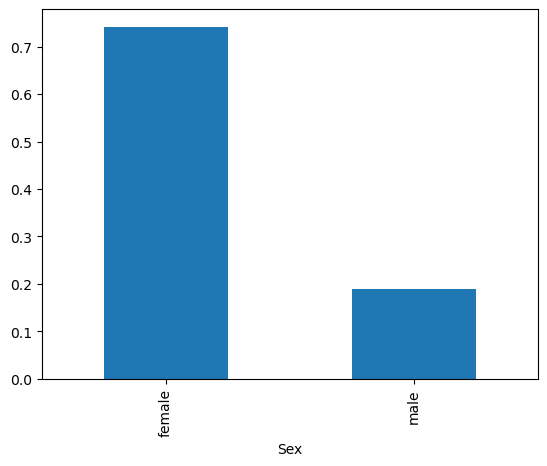

In [67]:
df = train.groupby('Sex').mean()["Survived"]
df.plot(kind='bar')
plt.show()

In [68]:
for ix in train.index:
  if train.loc[ix, 'Sex'] == "male" :
    train.loc[ix, 'Sex'] = 1
  else :
    train.loc[ix, 'Sex'] = 0

In [69]:
target = np.ravel(train.Survived)

In [70]:
train.drop(['Survived'], inplace = True, axis = 1)
train = train.astype(float)

In [71]:
model = models.Sequential()
model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [72]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(train, target, epochs = 30, batch_size =1, verbose = 1)

Epoch 1/30
891/891 [==============================] - 1s 565us/step - loss: 0.5909 - accuracy: 0.6801
Epoch 2/30
891/891 [==============================] - 0s 385us/step - loss: 0.5180 - accuracy: 0.7856
Epoch 3/30
891/891 [==============================] - 0s 388us/step - loss: 0.4975 - accuracy: 0.7868
Epoch 4/30
891/891 [==============================] - 0s 385us/step - loss: 0.4883 - accuracy: 0.7868
Epoch 5/30
891/891 [==============================] - 0s 380us/step - loss: 0.4807 - accuracy: 0.7868
Epoch 6/30
891/891 [==============================] - 0s 384us/step - loss: 0.4762 - accuracy: 0.7868
Epoch 7/30
891/891 [==============================] - 0s 393us/step - loss: 0.4678 - accuracy: 0.7823
Epoch 8/30
891/891 [==============================] - 0s 388us/step - loss: 0.4679 - accuracy: 0.7924
Epoch 9/30
891/891 [==============================] - 0s 377us/step - loss: 0.4650 - accuracy: 0.7823
Epoch 10/30
891/891 [==============================] - 0s 377us/step - loss: 0.465

In [73]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [74]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [75]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [76]:
train_images, test_images = train_images/255.0, test_images / 255.0

In [77]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))

In [78]:
model.add(layers.MaxPooling2D(2,2))

In [79]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [80]:
model.add(layers.MaxPooling2D(2,2))

In [81]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [82]:
model.add(layers.Flatten())

In [83]:
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [84]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [85]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1480 - accuracy: 0.9544
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0470 - accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0343 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0204 - accuracy: 0.9935
